In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from shapely.ops import unary_union
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("KP2020.csv", encoding="cp949")
df2 = pd.read_csv("KP2021.csv", encoding="cp949")
df3 = pd.read_csv("NPA2020.csv", encoding="cp949")

In [3]:
df1

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [4]:
df2

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [5]:
df3

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,342,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,19,10,501,1,,NaN,NaN,
1178240,20201122,5213,13,10,601,,,127.404663,36.341685,
1178241,20201122,4627,19,10,601,1,,NaN,NaN,Y
1178242,20201122,5246,19,5,301,1,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [6]:
#데이터 전처리
KP = pd.concat([df1, df2], axis=0, ignore_index=True)
KP = KP[['RECV_CPLT_DM','EVT_CL_CD', 'HPPN_X','HPPN_Y']]
KP = KP.dropna()
KP = KP.rename(columns={'RECV_CPLT_DM':'Time', 
                        'EVT_CL_CD':'Type',
                        'HPPN_X':'X',
                        'HPPN_Y':'Y'})
KP['Time'] = KP['Time'].str.replace(".000000000", "")
KP = gpd.GeoDataFrame(KP, geometry=gpd.points_from_xy(KP.X, KP.Y))
KP = KP.rename(columns={'geometry':'Location'})
KP['Time'] = pd.to_datetime(KP['Time'], format='%y/%m/%d %H:%M:%S')
KP.index = KP['Time']
KP.drop(['Time'], axis=1, inplace=True)
KP = KP.sort_index()


C:\Users\JSH\AppData\Local\Temp\ipykernel_22748\3014720749.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  KP['Time'] = KP['Time'].str.replace(".000000000", "")


In [7]:
#위도, 경도가 반대로 입력된 데이터 제거
KP.drop(KP[KP['X']<KP['Y']].index, axis=0, inplace=True)

In [8]:
KP

,Type,X,Y,Location
Time,,,,
2020-12-01 00:00:54,406,127.377982,36.299738,POINT (127.37798 36.29974)
2020-12-01 00:02:07,406,127.057063,36.774519,POINT (127.05706 36.77452)
2020-12-01 00:02:08,501,127.408753,36.321745,POINT (127.40875 36.32175)
2020-12-01 00:02:22,505,127.337740,36.368390,POINT (127.33774 36.36839)
2020-12-01 00:03:18,201,127.141725,36.828716,POINT (127.14172 36.82872)
...,...,...,...,...
2023-01-18 23:57:09,601,127.404663,36.341685,POINT (127.40466 36.34168)
2023-01-18 23:57:29,501,127.416765,36.332993,POINT (127.41676 36.33299)
2023-01-18 23:58:32,601,127.404663,36.341685,POINT (127.40466 36.34168)


In [9]:
# TA = Traffic Accident, 중복 좌표 제거
TA = KP.loc[KP['Type'] == 401]
TA.drop_duplicates(['X', 'Y'], inplace=True)


C:\Users\JSH\AppData\Local\Temp\ipykernel_22748\4081196303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TA.drop_duplicates(['X', 'Y'], inplace=True)


In [10]:
#멀리 떨어져있는 데이터 삭제
def crop(df, percentile_x=[0.001, 0.999], percentile_y=[0.001, 0.999]):

    min_x = df['X'].quantile(percentile_x[0])
    max_x = df['X'].quantile(percentile_x[1])
    min_y = df['Y'].quantile(percentile_y[0])
    max_y = df['Y'].quantile(percentile_y[1])
    df_cleaned = df[(df['X'] > min_x) & (df['X'] < max_x)
                    & (df['Y'] > min_y) & (df['Y'] < max_y)]
    return df_cleaned, (min_x, max_x, min_y, max_y)

TA, (min_x, max_x, min_y, max_y) = crop(TA)

min_x, max_x, min_y, max_y

(126.142020208, 127.58700798752004, 35.727390571520004, 37.33727967264006)

In [11]:
# From https://github.com/vuski/admdongkor
geo=gpd.read_file("HangJeongDong_ver20230101.geojson")

In [13]:
def visualize_by_city(df, column="sidonm", names=["대전광역시"]):
    # 분리되어 있는 map polygon 불러오고, 하나로 합침
    map_separated = [geo[geo[column]==name] for name in names]
    map_separated = pd.concat(map_separated)
    map_union = unary_union(map_separated["geometry"])
    
    # df에서 해당 polygon 내부의 좌표에 해당하는 점들만 loaction에 포함함
    f = lambda x: map_union.contains(x)
    result = df['Location'].apply(f)
    df_within = df[result]
    location = df_within['Location']
    
    # visualization
    plt.rcParams['font.family']='Malgun Gothic'
    ax = map_separated.plot(color='white',edgecolor='black',figsize=(12,12)) #지도
    location.plot(ax=ax,color='blue', markersize=1) #점
    plt.show()
    return location, map_union
    

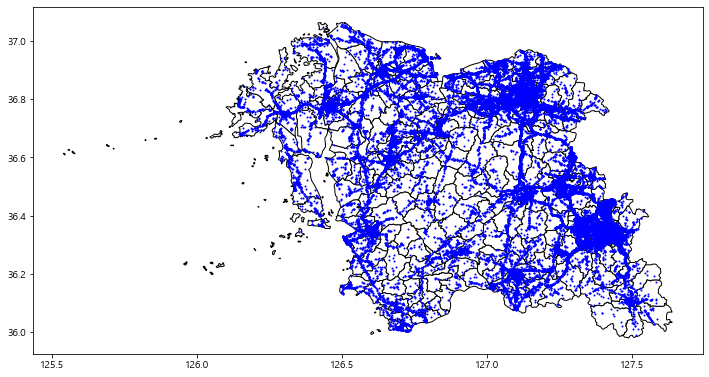

In [15]:
df, map_union = visualize_by_city(TA, names=["대전광역시", "세종특별자치시", "충청남도"])
# df, map_union = visualize_by_city(TA)
# 

In [13]:
len(df)
mapdf = pd.DataFrame()
mapdf['X'] = df.x
mapdf['Y'] = df.y
mapdf

NameError: name 'df' is not defined

In [ ]:
df, map_union = visualize_by_city(TA, names=["대전광역시"])

In [ ]:
df_daejeon =df
mapdf = pd.DataFrame()
mapdf['X'] = df.x
mapdf['Y'] = df.y
mapdf
print(mapdf['X'].min(),mapdf['X'].max())
print(mapdf['Y'].min(),mapdf['Y'].max())

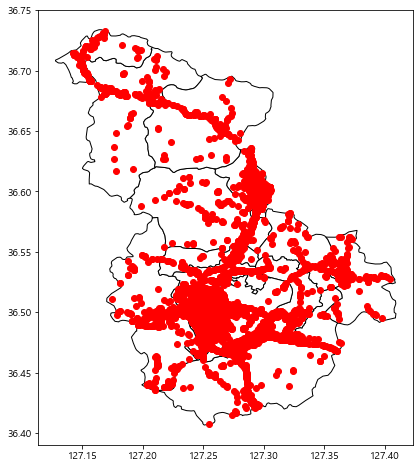

In [21]:
df_sejong, map_union = visualize_by_city(TA, names=["세종특별자치시"])

In [22]:
len(df_sejong)

7526

In [ ]:
#https://jimmy-ai.tistory.com/138

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = mapdf[['X', 'Y']]

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(mapdf), columns = data.columns)
    
# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=10)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

In [168]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from datetime import datetime, timedelta

def df_preprocessing(df, date):
    data = df[1]
    data.columns = data.iloc[0]
    data.drop(data.index[0], inplace=True)
    data["시:분"] = date + data["시:분"]
    data["시:분"] = pd.to_datetime(data["시:분"], format='%Y%m%d%H:%M')
    data.loc
    data.index = data["시:분"]
    data.index.names = ['시간']
    data.drop("시:분", axis=1, inplace=True)
    return data

source = urllib.request.urlopen('https://www.weather.go.kr/cgi-bin/aws/nph-aws_txt_min_cal_test?202012020000&0&MINDB_30M&133&m&M').read()
soup = BeautifulSoup(source,'lxml')

table = soup.find_all('table')
df = pd.read_html(str(table))

date = "202201010000"
data = df[1]
data.columns = data.iloc[0]
data.drop(data.index[0], inplace=True)
data["시:분"] = date[:-4] + data["시:분"]
data["시:분"] = pd.to_datetime(data["시:분"], format='%Y%m%d%H:%M')
data.index = data["시:분"]
data.index.names = ['시간']
data.drop("시:분", axis=1, inplace=True)
data[:48]



,강수,강수15,강수60,강수3H,강수6H,강수12H,일강수,기온,풍향1,풍향1,풍속1(m/s),풍향10,풍향10,풍속10(m/s),습도,해면기압
시간,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,○,0,0,0,0,0,0,0.9,317.6,NW,1.0,297.8,WNW,0.9,51,1034.0
2022-01-01 23:30:00,○,0,0,0,0,0,0,1.4,324.0,NW,0.8,328.9,NNW,0.6,48,1033.7
2022-01-01 23:00:00,○,0,0,0,0,0,0,1.4,0.0,-,0.1,327.6,-,0.1,45,1033.9
2022-01-01 22:30:00,○,0,0,0,0,0,0,1.6,358.6,N,0.2,344.5,NNW,0.3,46,1033.7
2022-01-01 22:00:00,○,0,0,0,0,0,0,1.7,65.8,ENE,1.1,38.7,NE,1.0,46,1033.6
2022-01-01 21:30:00,○,0,0,0,0,0,0,2.1,14.0,NNE,1.9,12.4,NNE,1.8,43,1033.5
2022-01-01 21:00:00,○,0,0,0,0,0,0,2.0,2.6,N,1.9,3.6,N,1.9,41,1033.8
2022-01-01 20:30:00,○,0,0,0,0,0,0,1.7,349.2,N,1.2,355.9,N,1.4,41,1034.0
2022-01-01 20:00:00,○,0,0,0,0,0,0,1.9,336.0,NNW,1.4,343.5,NNW,1.4,43,1034.4


In [93]:
data.columns

Index(['강수', '강수15', '강수60', '강수3H', '강수6H', '강수12H', '일강수', '기온', '풍향1',
       '풍향1', '풍속1(m/s)', '풍향10', '풍향10', '풍속10(m/s)', '습도', '해면기압'],
      dtype='object', name=0)

SyntaxError: invalid syntax (4265934424.py, line 1)

In [157]:
LOC = {"대전":133 ,"세종":239}

def get_weather(loc=None, now="2020-12-01", ret_data=None):
    if now != "2020-12-01":      
        now = datetime.strptime(now, "%Y%m%d%H%M%S")
    else:
        now = datetime.strptime(now, "%Y-%m-%d")
    end = datetime.strptime("2023-01-18", "%Y-%m-%d")
#     end = datetime.strptime("2020-12-05", "%Y-%m-%d")
    loc_code = LOC[loc]
    if ret_data is None:
        ret_data = pd.DataFrame(columns = ['강수', '강수15', '강수60', '강수3H', '강수6H', '강수12H', '일강수', '기온', '풍향1',
           '풍향1', '풍속1(m/s)', '풍향10', '풍향10', '풍속10(m/s)', '습도', '해면기압'])
                
    while now <= end:
        dates = now.strftime("%Y%m%d")+ "235900"
        print(dates)
        now += timedelta(days=1)
        
        try:
            source = urllib.request.urlopen(f'https://www.weather.go.kr/cgi-bin/aws/nph-aws_txt_min_cal_test?{dates}&0&MINDB_30M&{str(loc_code)}&m&M').read()
            soup = BeautifulSoup(source,'lxml')
        except:
            return dates, ret_data
        
        table = soup.find_all('table')
        df = pd.read_html(str(table))
        data = df_preprocessing(df, (now-timedelta(days=1)).strftime("%Y%m%d"))[:48]
        ret_data = pd.concat([data, ret_data])
    
    return dates, ret_data

In [158]:
pd.set_option('display.max_rows', None)
dates, daejeon_weather = get_weather("대전")
print(dates)

20201201235900
20201202235900
20201203235900
20201204235900
20201205235900
20201206235900
20201207235900
20201208235900
20201209235900
20201210235900
20201211235900
20201212235900
20201213235900
20201214235900
20201215235900
20201216235900
20201217235900
20201218235900
20201219235900
20201220235900
20201221235900
20201222235900
20201223235900
20201224235900
20201225235900
20201226235900
20201227235900
20201228235900
20201229235900
20201230235900
20201231235900
20210101235900
20210102235900
20210103235900
20210104235900
20210105235900
20210106235900
20210107235900
20210108235900
20210109235900
20210110235900
20210111235900
20210112235900
20210113235900
20210114235900
20210115235900
20210116235900
20210117235900
20210118235900
20210119235900
20210120235900
20210121235900
20210122235900
20210123235900
20210124235900
20210125235900
20210126235900
20210127235900
20210128235900
20210129235900
20210130235900
20210131235900
20210201235900
20210202235900
20210203235900
20210204235900
2021020523

In [160]:
dates, daejeon_weather = get_weather("대전", now=dates, ret_data=daejeon_weather)
print(dates)

20220827235900
20220828235900
20220829235900
20220830235900
20220831235900
20220901235900
20220902235900
20220903235900
20220904235900
20220905235900
20220906235900
20220907235900
20220908235900
20220909235900
20220910235900
20220911235900
20220912235900
20220913235900
20220914235900
20220915235900
20220916235900
20220917235900
20220918235900
20220919235900
20220920235900
20220921235900
20220922235900
20220923235900
20220924235900
20220925235900
20220926235900
20220927235900
20220928235900
20220929235900
20220930235900
20221001235900
20221002235900
20221003235900
20221004235900
20221005235900
20221006235900
20221007235900
20221008235900
20221009235900
20221010235900
20221011235900
20221012235900
20221013235900
20221014235900
20221015235900
20221016235900
20221017235900
20221018235900
20221019235900
20221020235900
20221021235900
20221022235900
20221023235900
20221024235900
20221025235900
20221026235900
20221027235900
20221028235900
20221029235900
20221030235900
20221031235900
2022110123

In [162]:
pd.set_option('display.max_rows', 100)

daejeon_weather.to_csv("daejeon_weather.csv")

In [164]:
pd.set_option('display.max_rows', None)
dates, sejong_weather = get_weather("세종")
print(dates)

20201201235900
20201202235900
20201203235900
20201204235900
20201205235900
20201206235900
20201207235900
20201208235900
20201209235900
20201210235900
20201211235900
20201212235900
20201213235900
20201214235900
20201215235900
20201216235900
20201217235900
20201218235900
20201219235900
20201220235900
20201221235900
20201222235900
20201223235900
20201224235900
20201225235900
20201226235900
20201227235900
20201228235900
20201229235900
20201230235900
20201231235900
20210101235900
20210102235900
20210103235900
20210104235900
20210105235900
20210106235900
20210107235900
20210108235900
20210109235900
20210110235900
20210111235900
20210112235900
20210113235900
20210114235900
20210115235900
20210116235900
20210117235900
20210118235900
20210119235900
20210120235900
20210121235900
20210122235900
20210123235900
20210124235900
20210125235900
20210126235900
20210127235900
20210128235900
20210129235900
20210130235900
20210131235900
20210201235900
20210201235900


In [166]:
dates, sejong_weather = get_weather("세종", now=dates, ret_data=daejeon_weather)
print(dates)

20210914235900
20210915235900
20210916235900
20210917235900
20210918235900
20210919235900
20210920235900
20210921235900
20210922235900
20210923235900
20210924235900
20210925235900
20210926235900
20210927235900
20210928235900
20210929235900
20210930235900
20211001235900
20211002235900
20211003235900
20211004235900
20211005235900
20211006235900
20211007235900
20211008235900
20211009235900
20211010235900
20211011235900
20211012235900
20211013235900
20211014235900
20211015235900
20211016235900
20211017235900
20211018235900
20211019235900
20211020235900
20211021235900
20211022235900
20211023235900
20211024235900
20211025235900
20211026235900
20211027235900
20211028235900
20211029235900
20211030235900
20211031235900
20211101235900
20211102235900
20211103235900
20211104235900
20211105235900
20211106235900
20211107235900
20211108235900
20211109235900
20211110235900
20211111235900
20211112235900
20211113235900
20211114235900
20211115235900
20211116235900
20211117235900
20211118235900
2021111923

In [167]:
pd.set_option('display.max_rows', 100)
sejong_weather
sejong_weather.to_csv("sejong_weather.csv")